In [23]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


In [49]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")

mutations = pandas.read_csv("../data/mutations.csv.bz2")
mutations["indel"] = mutations.ref.str.len() != mutations.alt.str.len()
mutations["mnv"] = (mutations.ref.str.len() == mutations.alt.str.len()) & (mutations.alt.str.len() > 1)
mutations["platinum_mnv"] = mutations.ref.isin(["CT", "CA"]) & mutations.alt.isin(["AC"])

sources["mnvs"] = mutations.groupby("source_id")["mnv"].sum()
sources["fraction_mnvs"] = mutations.groupby("source_id")["mnv"].mean()

sources["indels"] = mutations.groupby("source_id")["indel"].sum()
sources["fraction_indels"] = mutations.groupby("source_id")["indel"].mean()

sources["platinum_mnvs"] = mutations.groupby("source_id")["platinum_mnv"].sum()
sources["fraction_platinum_mnvs"] = mutations.groupby("source_id")["platinum_mnv"].mean()


for col in treatments_matrix.columns:
    sources[col] = treatments_matrix[col]
    sources[col + "_status"] = [
        col if row[col] else ("untreated" if not sources.ix[source_id].treated else "other treated")
        for (source_id, row) in treatments_matrix.iterrows()
    ]
sources

treatments_matrix = pandas.read_csv("../data/treatments_matrix.csv", index_col=0)
treatments_matrix

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,farletuzumab/placebo,nab-paclitaxel,etoposide
source_id,,,,,,,,,,,,,
AOCS-001-1/SP101515,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-002-1/SP101517,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1/SP101519,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1/SP101521,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-13/SP101524,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-034-1/SP101523,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-055-1/SP101526,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1/SP101528,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1/SP101530,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
mutations.ix[mutations.context_mutation_3p5p == "G(>T)T"]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,mnv,platinum_mnv


In [86]:
mutations.ix[(mutations.ref == "-") & (mutations.alt == "G")]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,mnv,platinum_mnv
103281,AOCS-149-1/SP102000,AOCS-149,1,GRCh37,11,67201963,67201964,-,G,intronic,AP003419.16 RPS6KB2,CAGGCCTCAGGCCCC,GCACTCACCAGGAAG,C>C,NaN,NaN,NaN,7,0,7,NaN,True,False,11:67201963 ->G,11:67201963,0.233333,0.433333,0.066667,0.266667,0.700000,False,C(C>C),(C>C)G,C(C>C)G,mutations_with_mnvs,NaN,NaN,NaN,NaN,NaN,False,{},0,False,False,False
137540,AOCS-152-1/SP102025,AOCS-152,1,GRCh37,8,144873374,144873375,-,G,p.V1643fs,SCRIB,CAGCAGCCGCCGCCC,GTAAGGCCTGGGCGC,C>C,146,0,146,1747,0,1759,0.999999,True,False,8:144873374 ->G,8:144873374,0.133333,0.433333,0.066667,0.366667,0.800000,False,C(C>C),(C>C)G,C(C>C)G,mutations_with_mnvs,428.28,A*66:01,1747,0,1759,True,"{'KSFNLGVSILK': 37.58, 'QHHPCPKS': 38315.49, '...",7,False,False,False
216192,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,11,555482,555483,-,G,p.V533fs,C11orf35,GGGGCCTGCTGCCCC,AGTGAGCTCGGGGAA,C>C,NaN,NaN,NaN,30,0,32,NaN,False,False,11:555482 ->G,11:555482,0.133333,0.300000,0.133333,0.433333,0.733333,False,C(C>C),(C>C)A,C(C>C)A,mutations_with_mnvs,30.57,C*06:02,30,0,32,True,"{'AREPRDPR': 3447.89, 'GGACAARE': 41330.34, 'R...",0,False,False,False
217175,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,19,3544736,3544737,-,G,intronic,AC005786.7 MFSD12,CATTTCCACCCCTCC,TTGCAGGGGACCGTG,C>C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,19:3544736 ->G,19:3544736,0.133333,0.400000,0.233333,0.233333,0.633333,False,C(C>C),(C>C)T,C(C>C)T,mutations_with_mnvs,NaN,NaN,NaN,NaN,NaN,False,{},0,False,False,False
219325,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,7,44796991,44796992,-,G,p.L131fs,ZMIZ2,GAGGCCCAGGCCCCC,GGGCCGCCTGCATAC,C>C,NaN,NaN,NaN,2,0,2,NaN,False,False,7:44796991 ->G,7:44796991,0.133333,0.466667,0.066667,0.333333,0.800000,False,C(C>C),(C>C)G,C(C>C)G,mutations_with_mnvs,16247.99,A*01:01,2,0,2,False,"{'YAGGPGGPGP': 40247.16, 'GYAGGPGGPG': 37186.8...",0,False,False,False
220197,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,X,49087076,49087077,-,G,intronic,CACNA1F,TGCCCGGTGCTCCCC,ATCAGGCTGTTCAGC,C>C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,X:49087076 ->G,X:49087076,0.100000,0.400000,0.233333,0.266667,0.666667,False,C(C>C),(C>C)A,C(C>C)A,mutations_with_mnvs,NaN,NaN,NaN,NaN,NaN,False,{},0,False,False,False
289726,AOCS-133-1/SP101835,AOCS-133,1,GRCh37,19,1106457,1106458,-,G,splice-donor,GPX4,CTAGAGAGGACCTAC,AGGGGCTCCTCCATG,C>C,31,0,31,NaN,NaN,NaN,0.999997,True,False,19:1106457 ->G,19:1106457,0.233333,0.300000,0.166667,0.300000,0.600000,False,C(C>C),(C>C)A,C(C>C)A,mutations_with_mnvs,NaN,NaN,NaN,NaN,NaN,False,{},0,False,False,False
853304,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,2,27305735,27305736,-,G,p.L435fs,EMILIN1,AGTGGCTCAGCCCCC,AGGAGCCCCAGGCCA,C>C,NaN,NaN,NaN,38,0,38,NaN,False,False,2:27305735 ->G,2:27305735,0.200000,0.433333,0.066667,0.300000,0.733333,False,C(C>C),(C>C)A,C(C>C)A,mutations_with_mnvs,9.92,B*57:01,38,0,38,True,"{'WPGAPGGAEPL': 29973.9, 'AALLWGPWGA': 12160.4...",8,False,False,False
863491,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,10,72534059,72534060,-,G,p.Q276fs,TBATA,GCTCAGCTCCTTCCC,AGCCCCTAGTCTCCA,C>C,NaN,NaN,NaN,0,0,0,NaN,False,False,10:72534059 ->G,10:72534059,0.133333,0.500000,0.233333,0.133333,0.633333,False,C(C>C),(C>C)A,C(C>C)A,mutations_with_mnvs,655.36,B*27:05,0,0,0,False,"{'PAPSLHPYRKA': 35219.55, 'LLPPAPSLHP': 33997....",0,False,False,False
867806,AOCS-166-1/SP102133,AOCS-166,1,GRCh37,3,49680363,49680364,-,G,p.T435fs,BSN,GACTGGTTGTTCCCC,AGTTTTCGGCAGGGC,C>C,NaN,NaN,NaN,0,0,0,NaN,False,False,3:49680363 ->G,3:49680363,0.100000,0.266667,0.300000,0.333333,0.600000,False,C(C>C),(C>C)A,C(C>C)A,m

In [81]:
mutations.ix[(mutations.ref == "G") & (mutations.alt == "GT")]

,source_id,donor,called,genome,contig,interbase_start,interbase_end,ref,alt,effect,gene,context_5_prime,context_3_prime,context_mutation,dna_alt_reads,dna_ref_reads,dna_total_reads,rna_alt_reads,rna_ref_reads,rna_total_reads,vaf,any_alt_reads,snv,mutation_id,site_id,context_A,context_C,context_T,context_G,context_GC,unique_to_treated,context_mutation_5p,context_mutation_3p,context_mutation_3p5p,sources,binding_affinity,binding_allele,num_alt,num_ref,total_depth,binder,binding_peptides,num_binders,indel,mnv,platinum_mnv


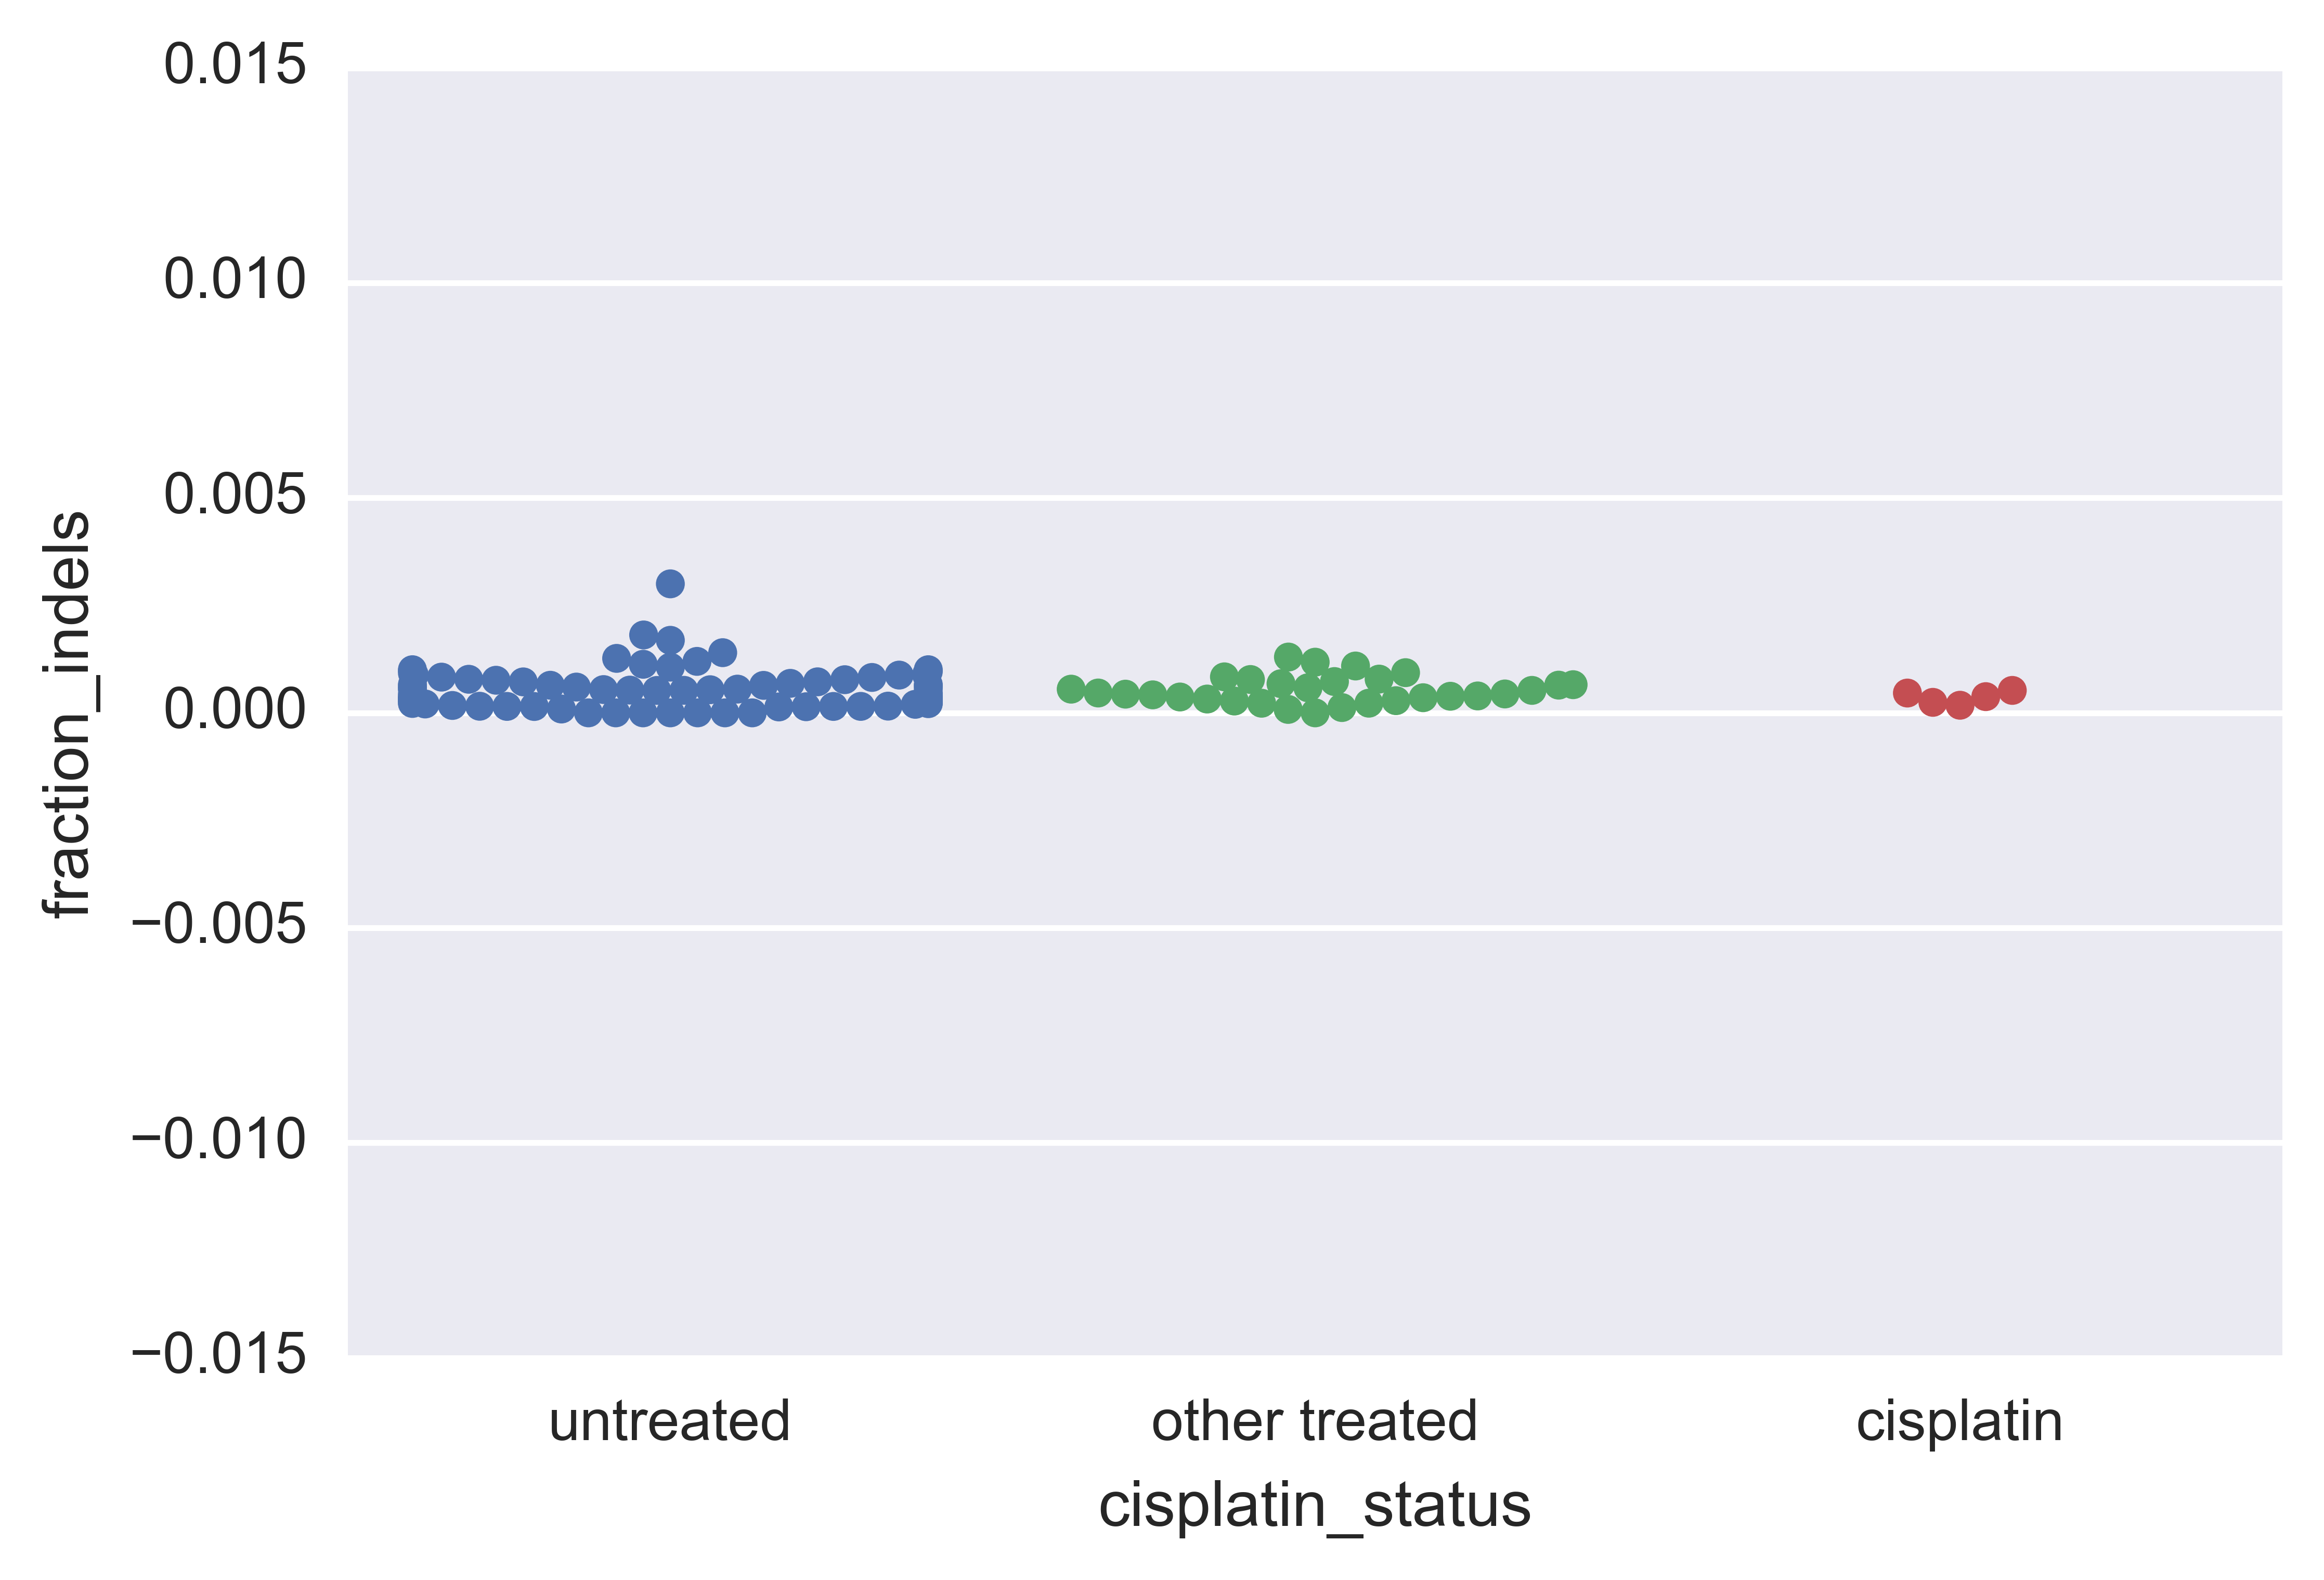

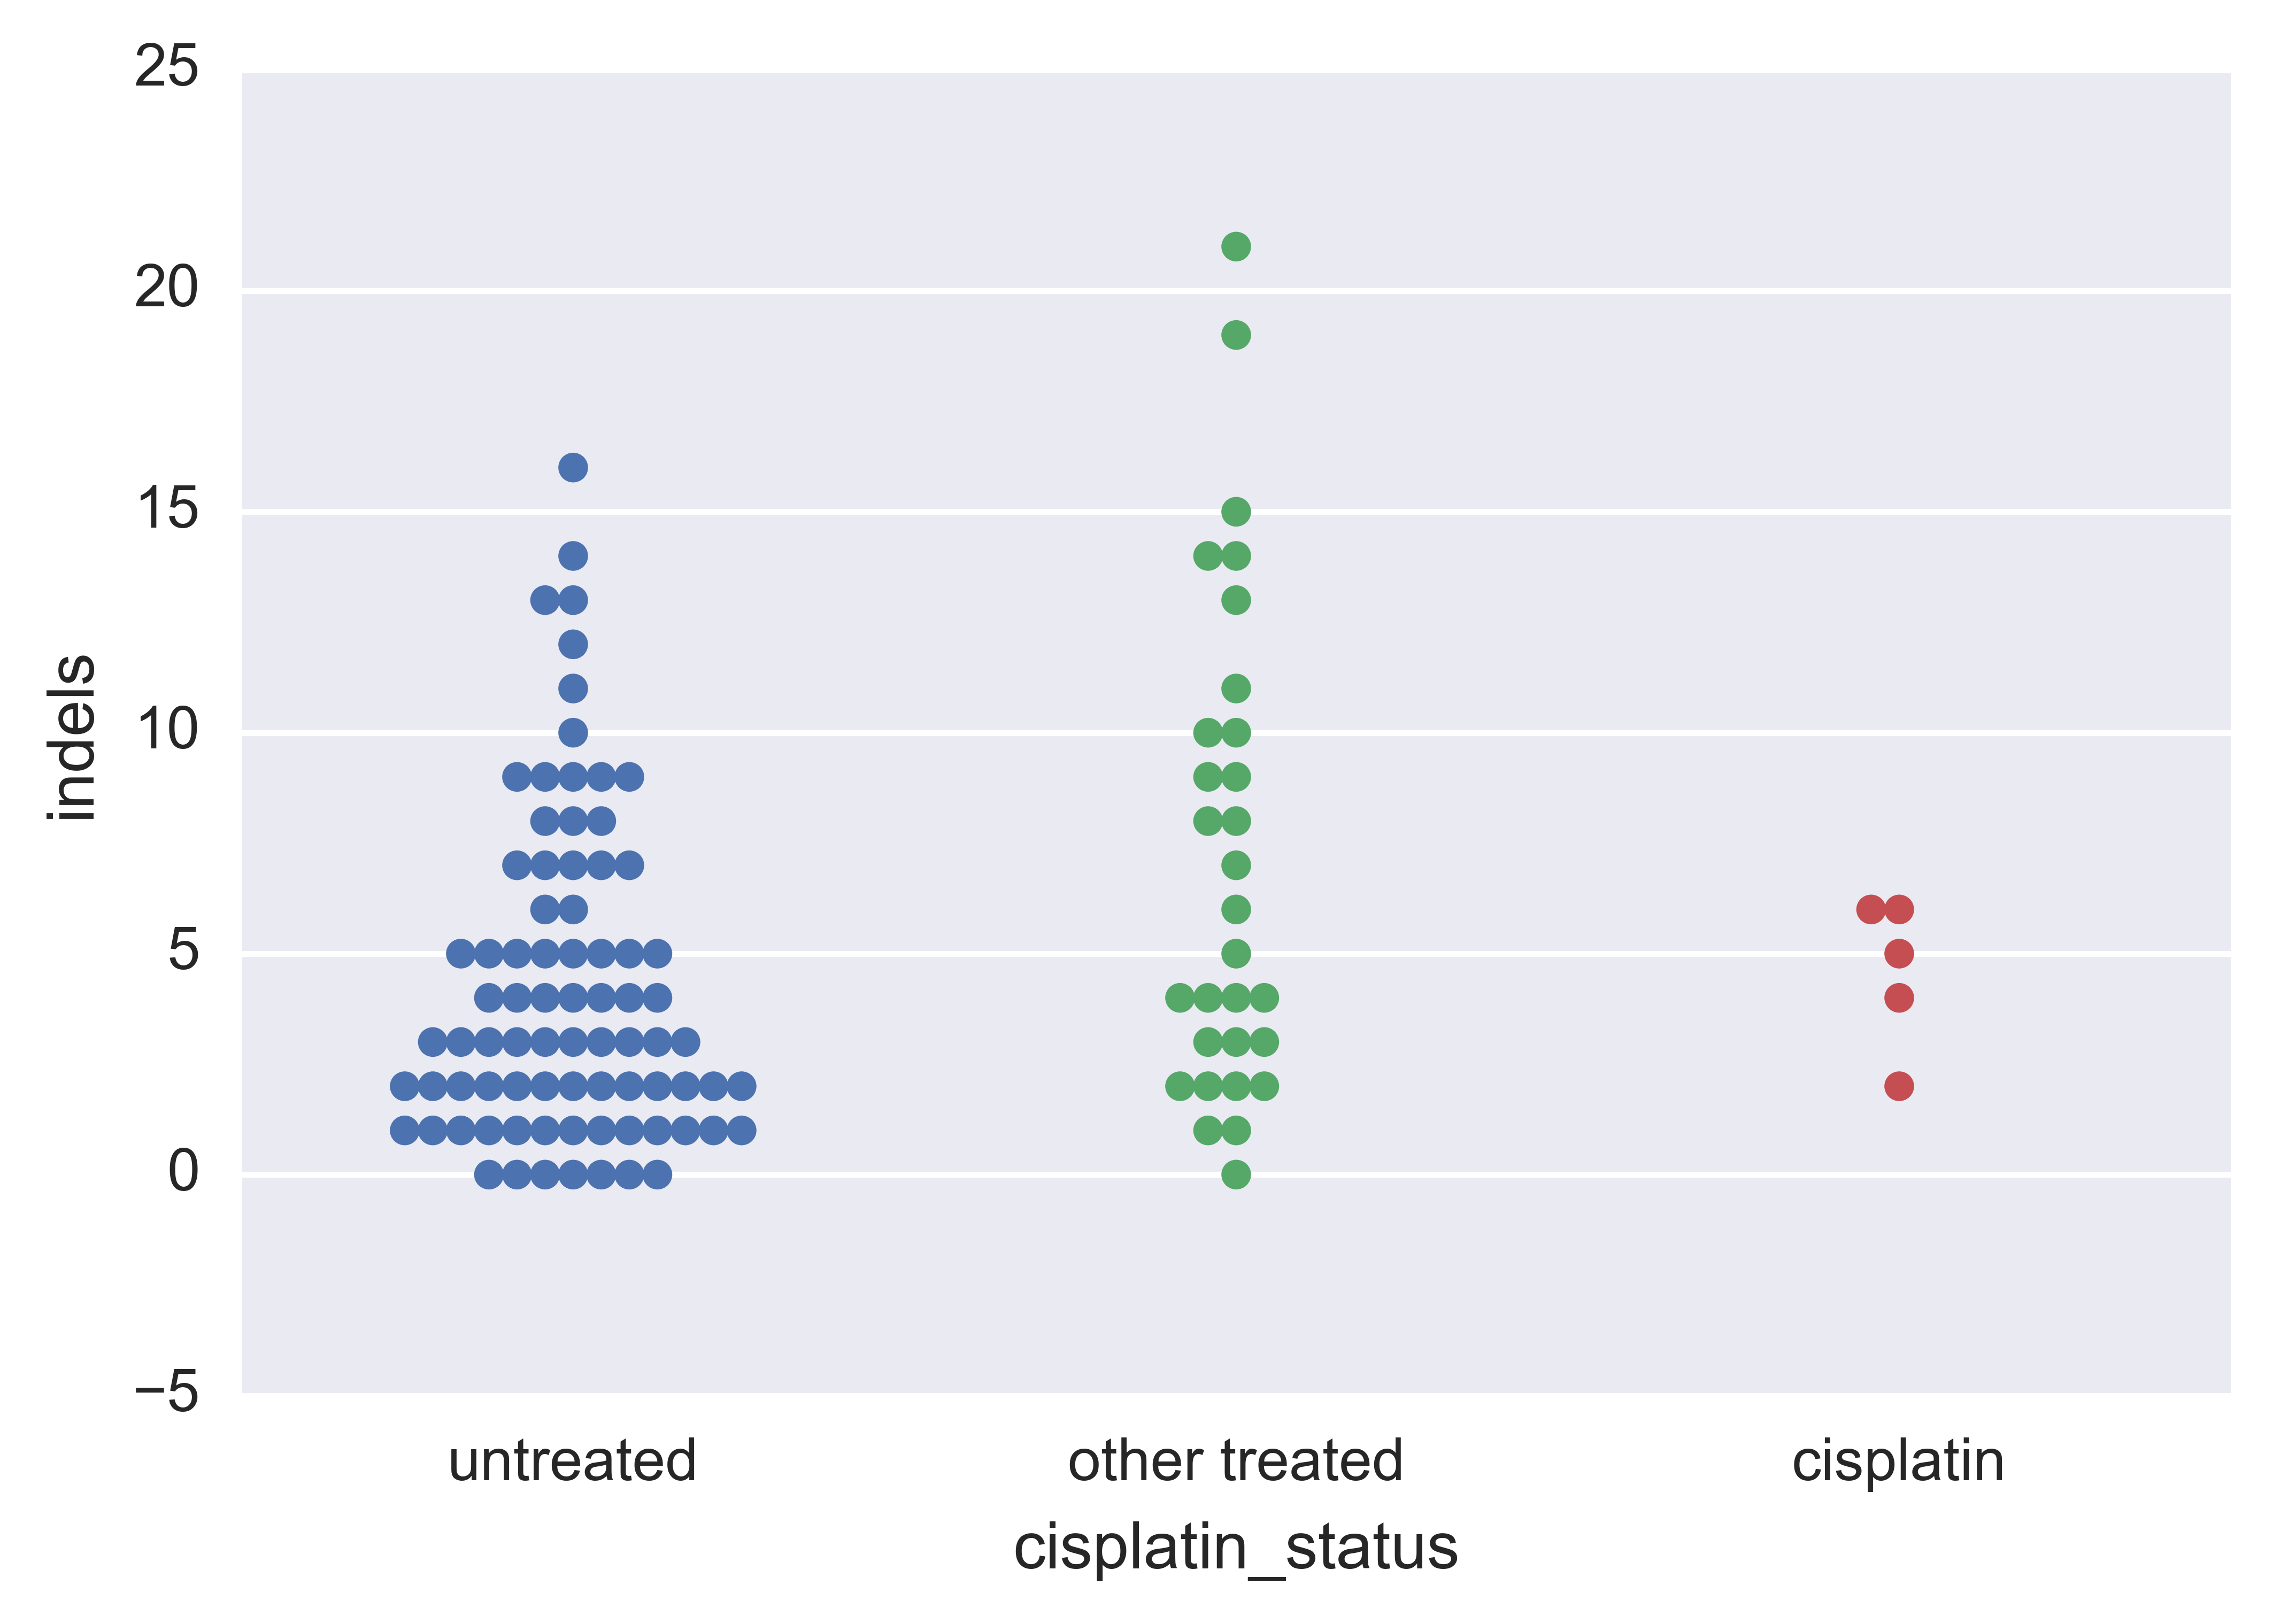

In [50]:
seaborn.swarmplot(data=sources, x="cisplatin_status", y="fraction_indels")
pyplot.figure()
seaborn.swarmplot(data=sources, x="cisplatin_status", y="indels")

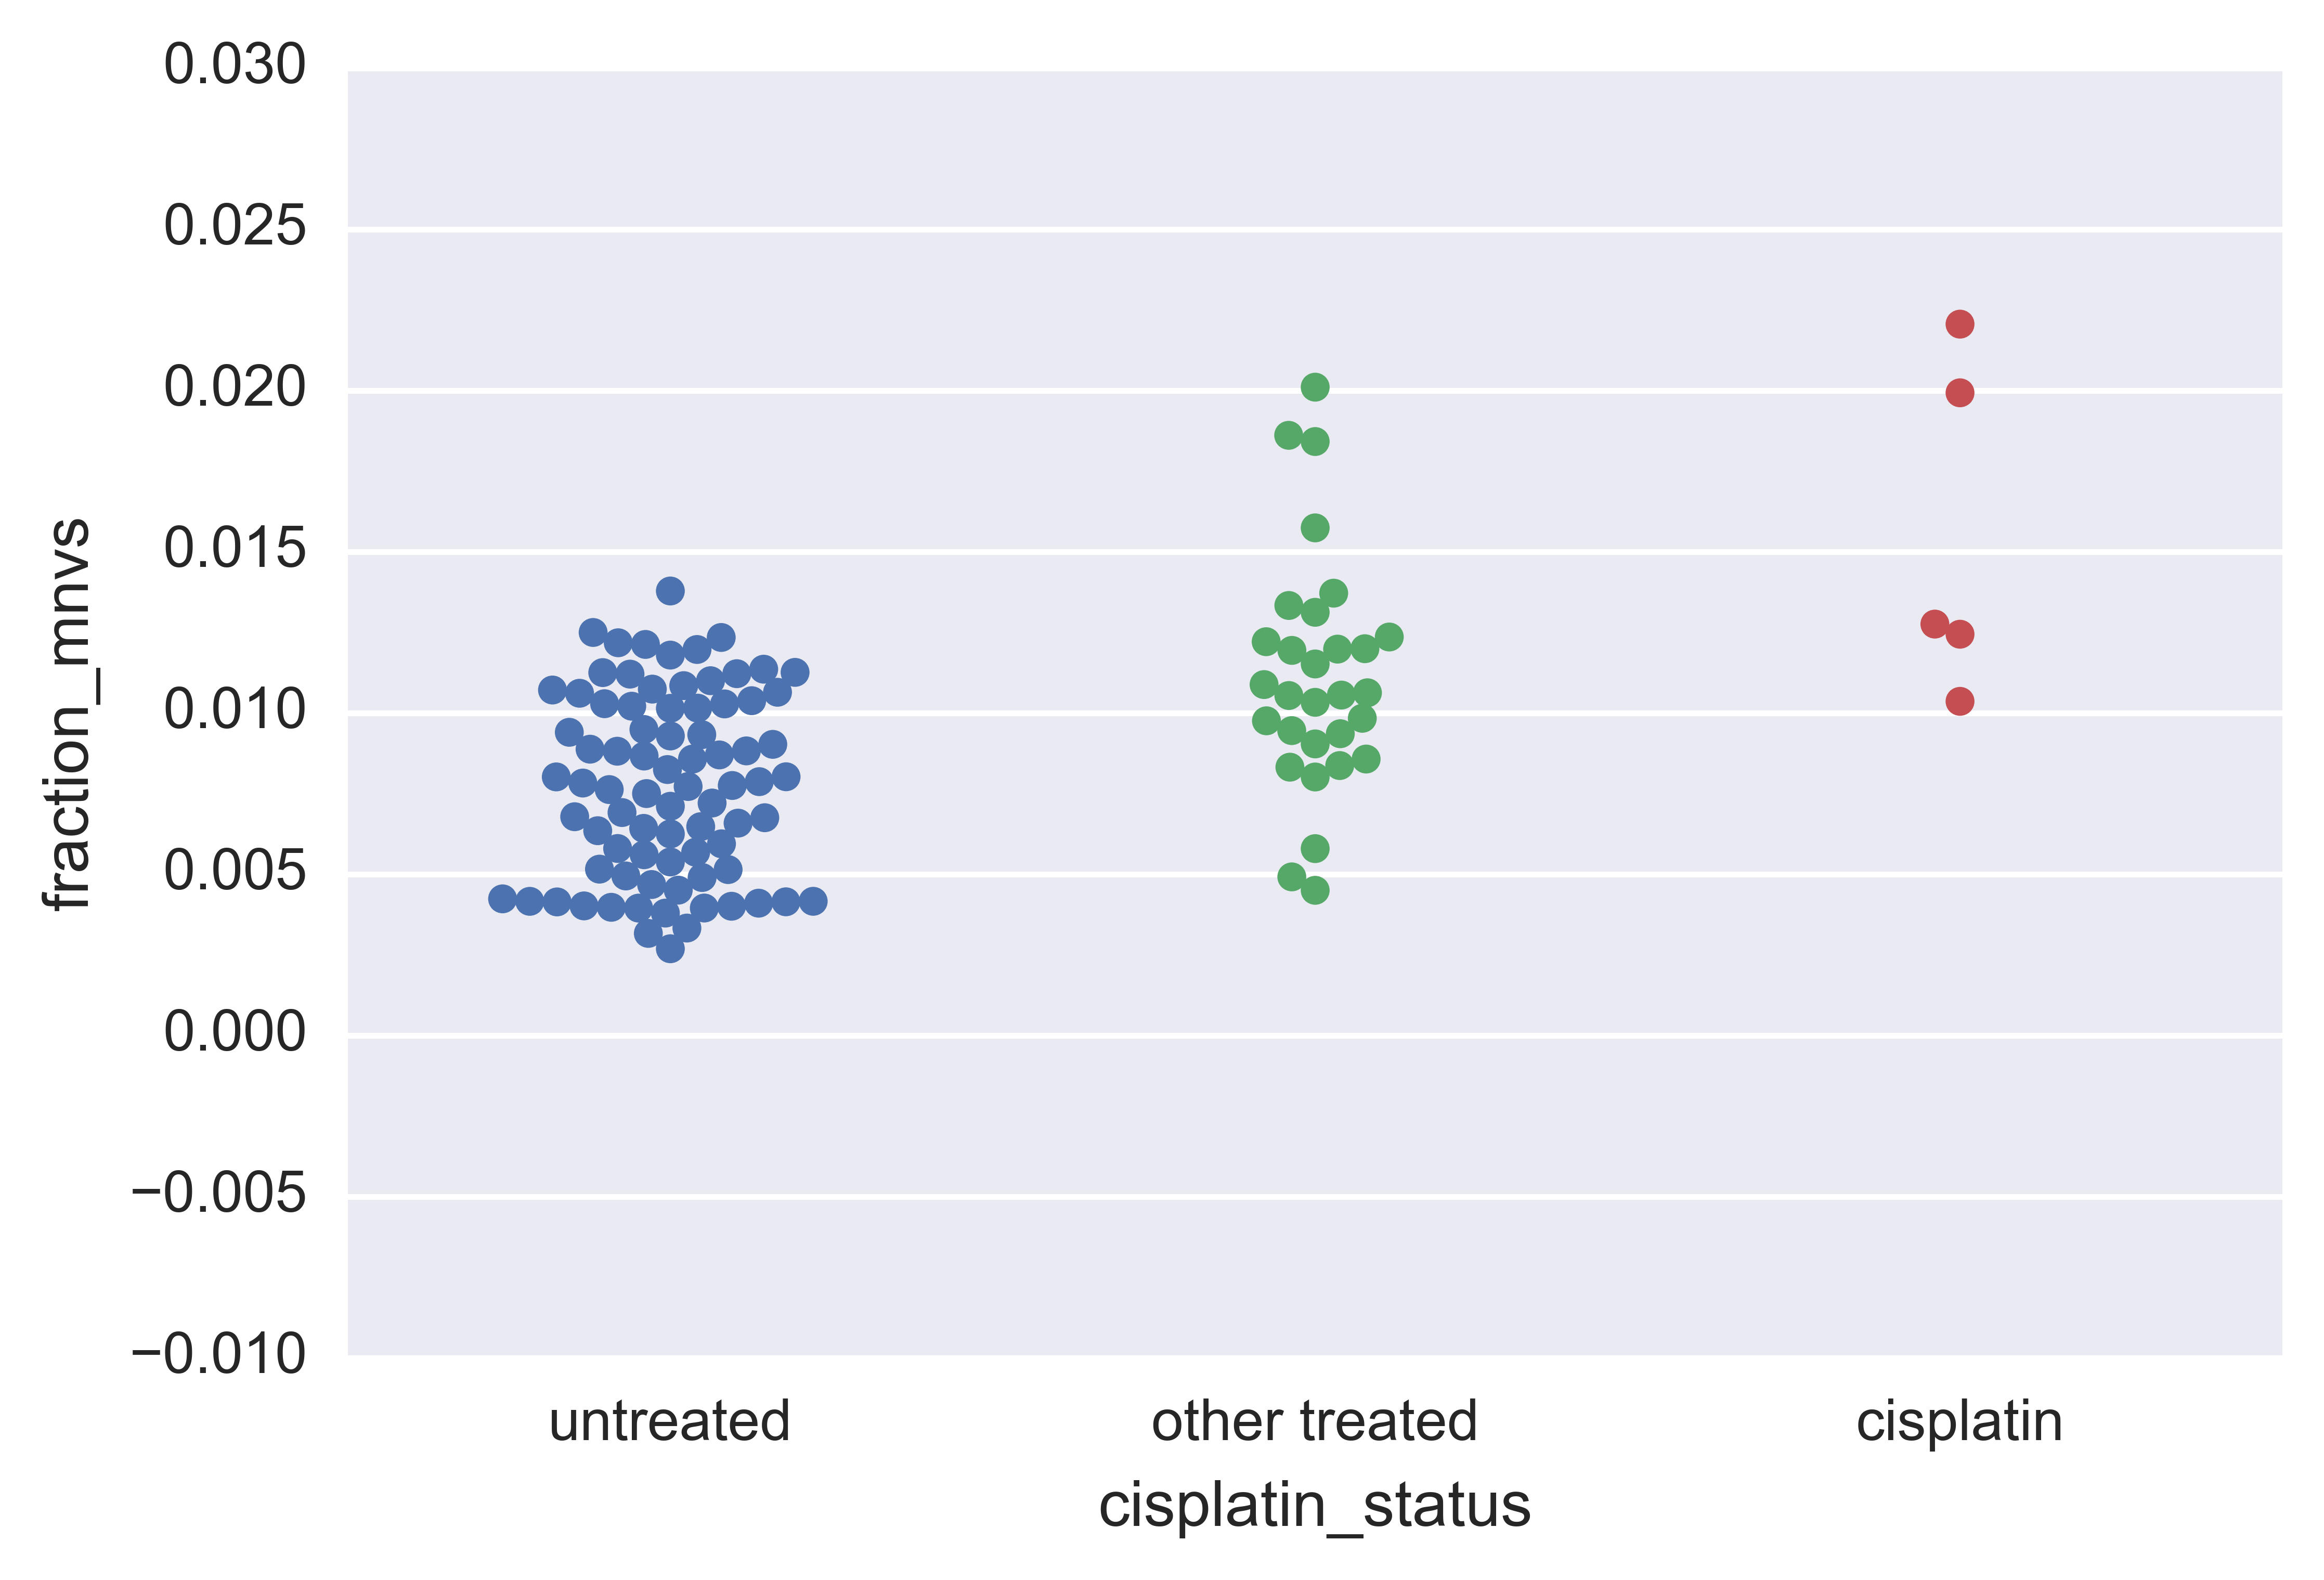

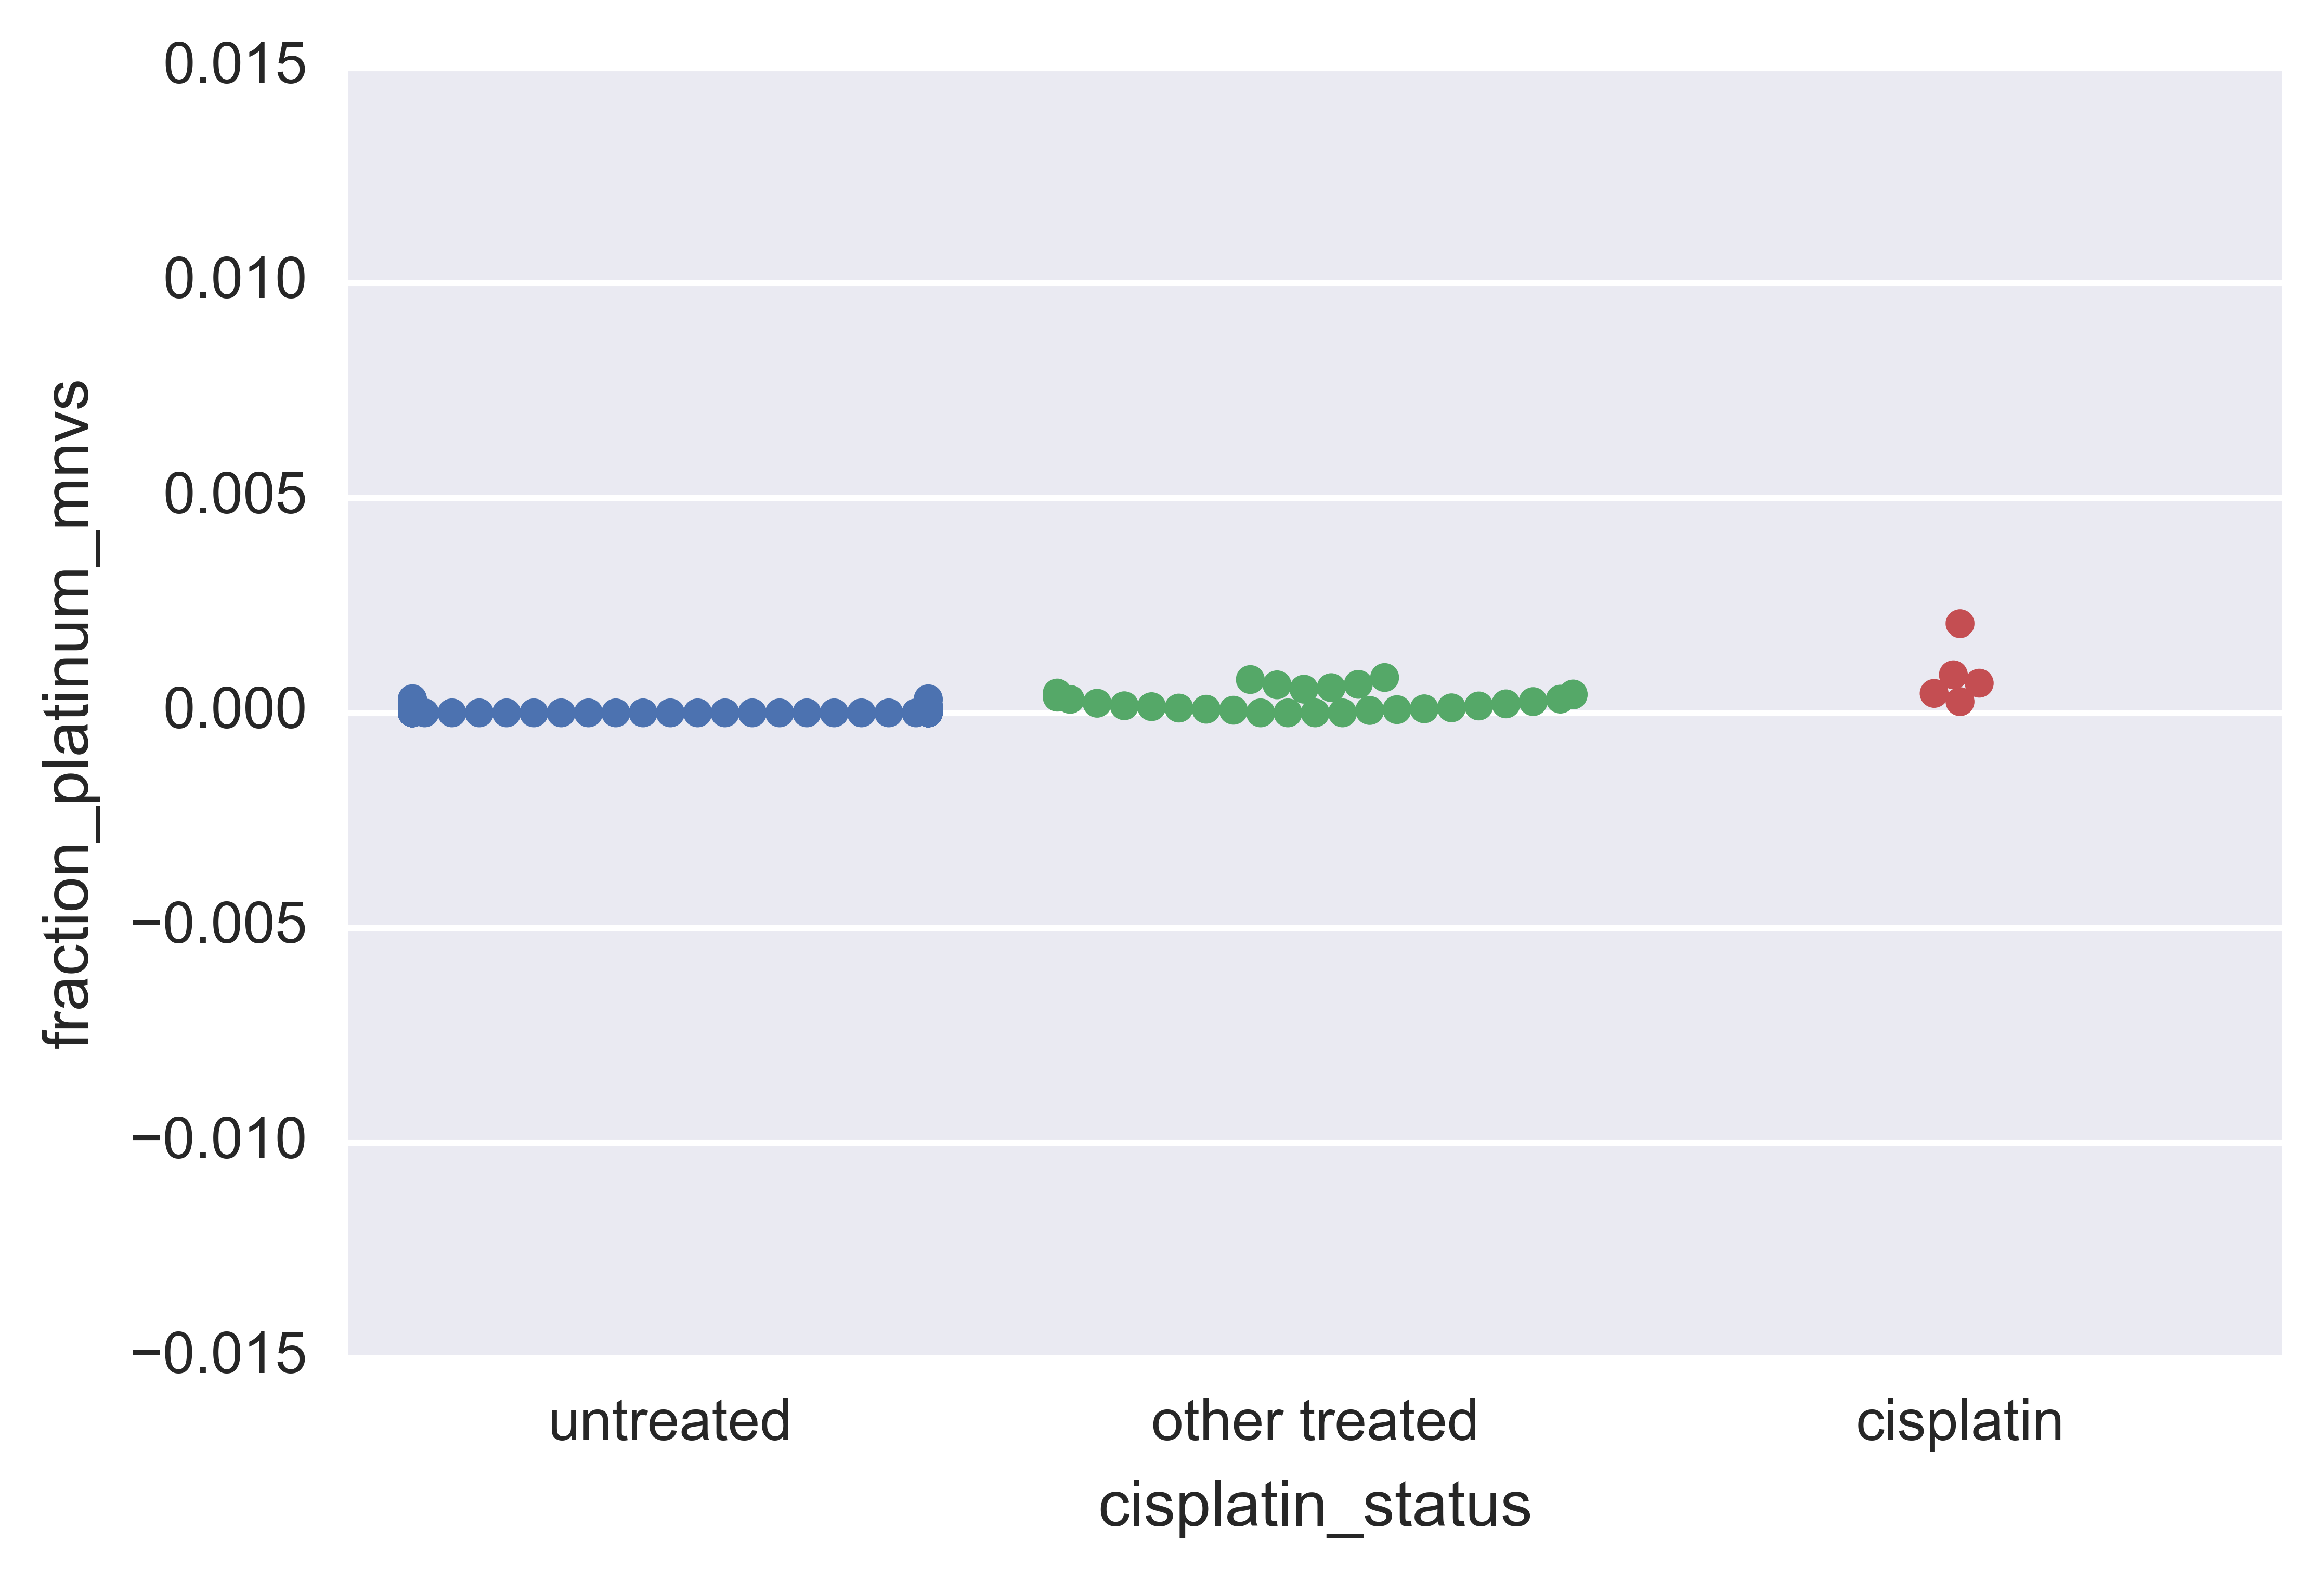

In [39]:
seaborn.swarmplot(data=sources, x="cisplatin_status", y="fraction_mnvs")
pyplot.figure()
seaborn.swarmplot(data=sources, x="cisplatin_status", y="fraction_platinum_mnvs")

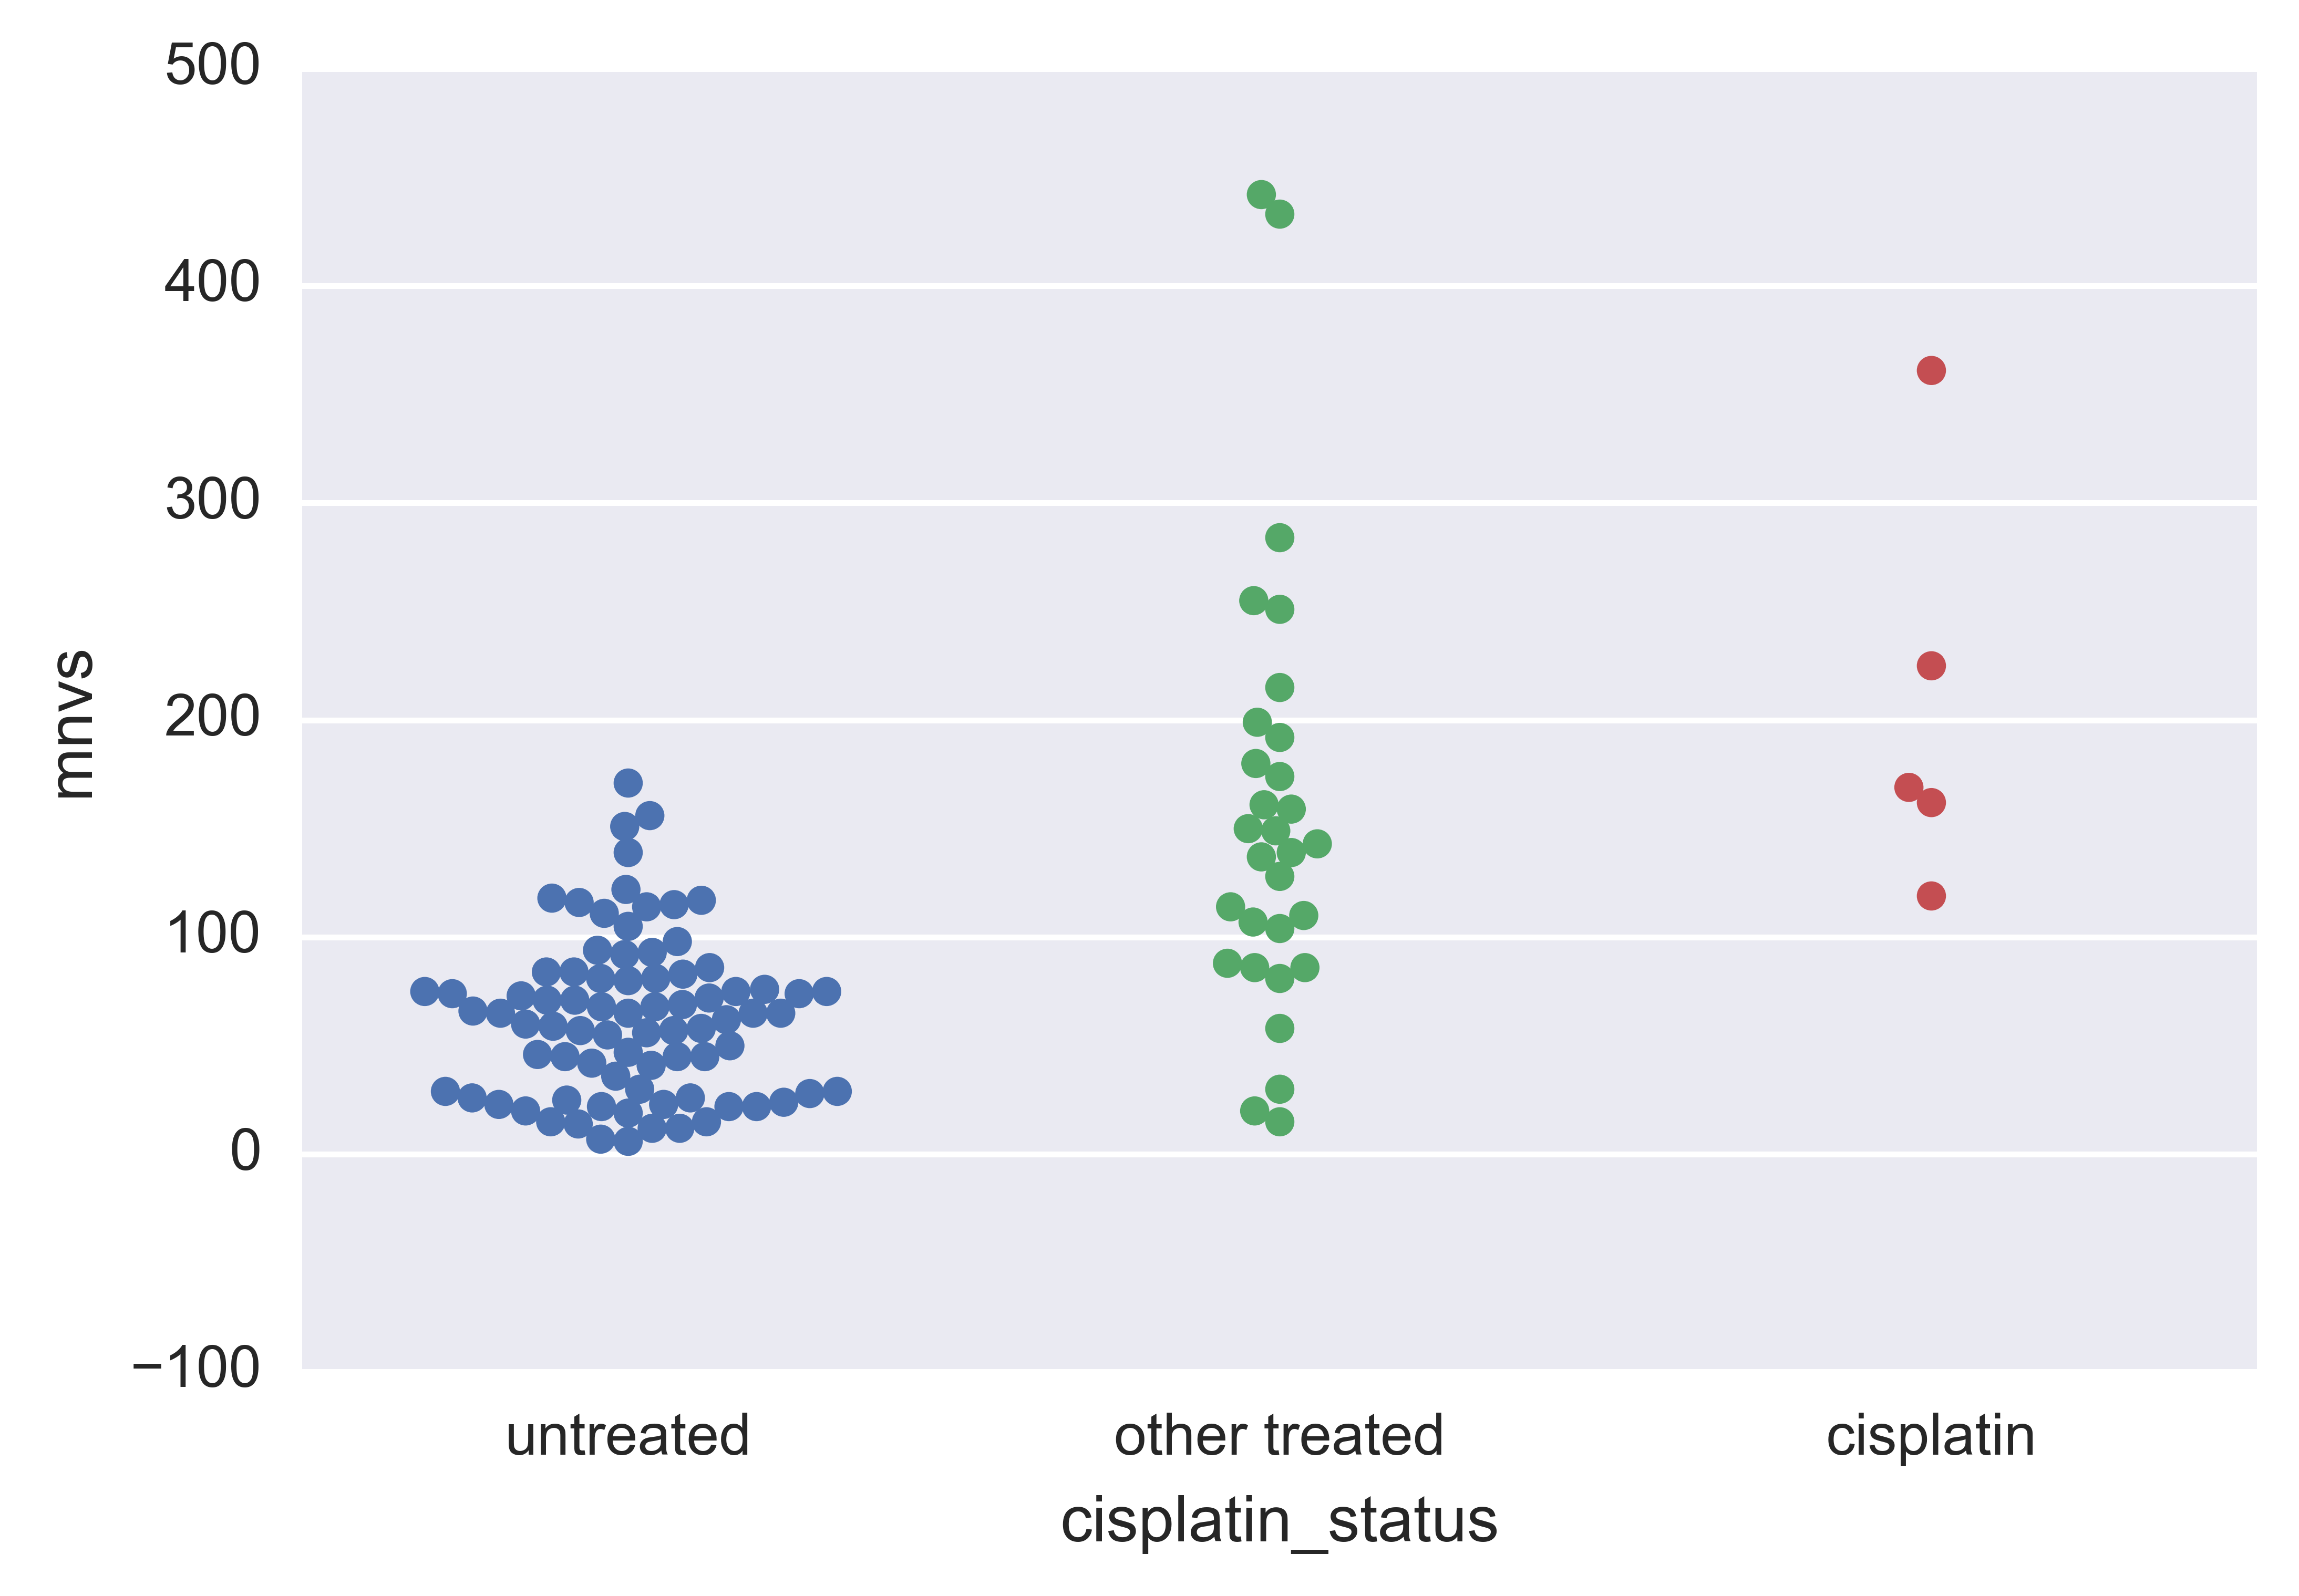

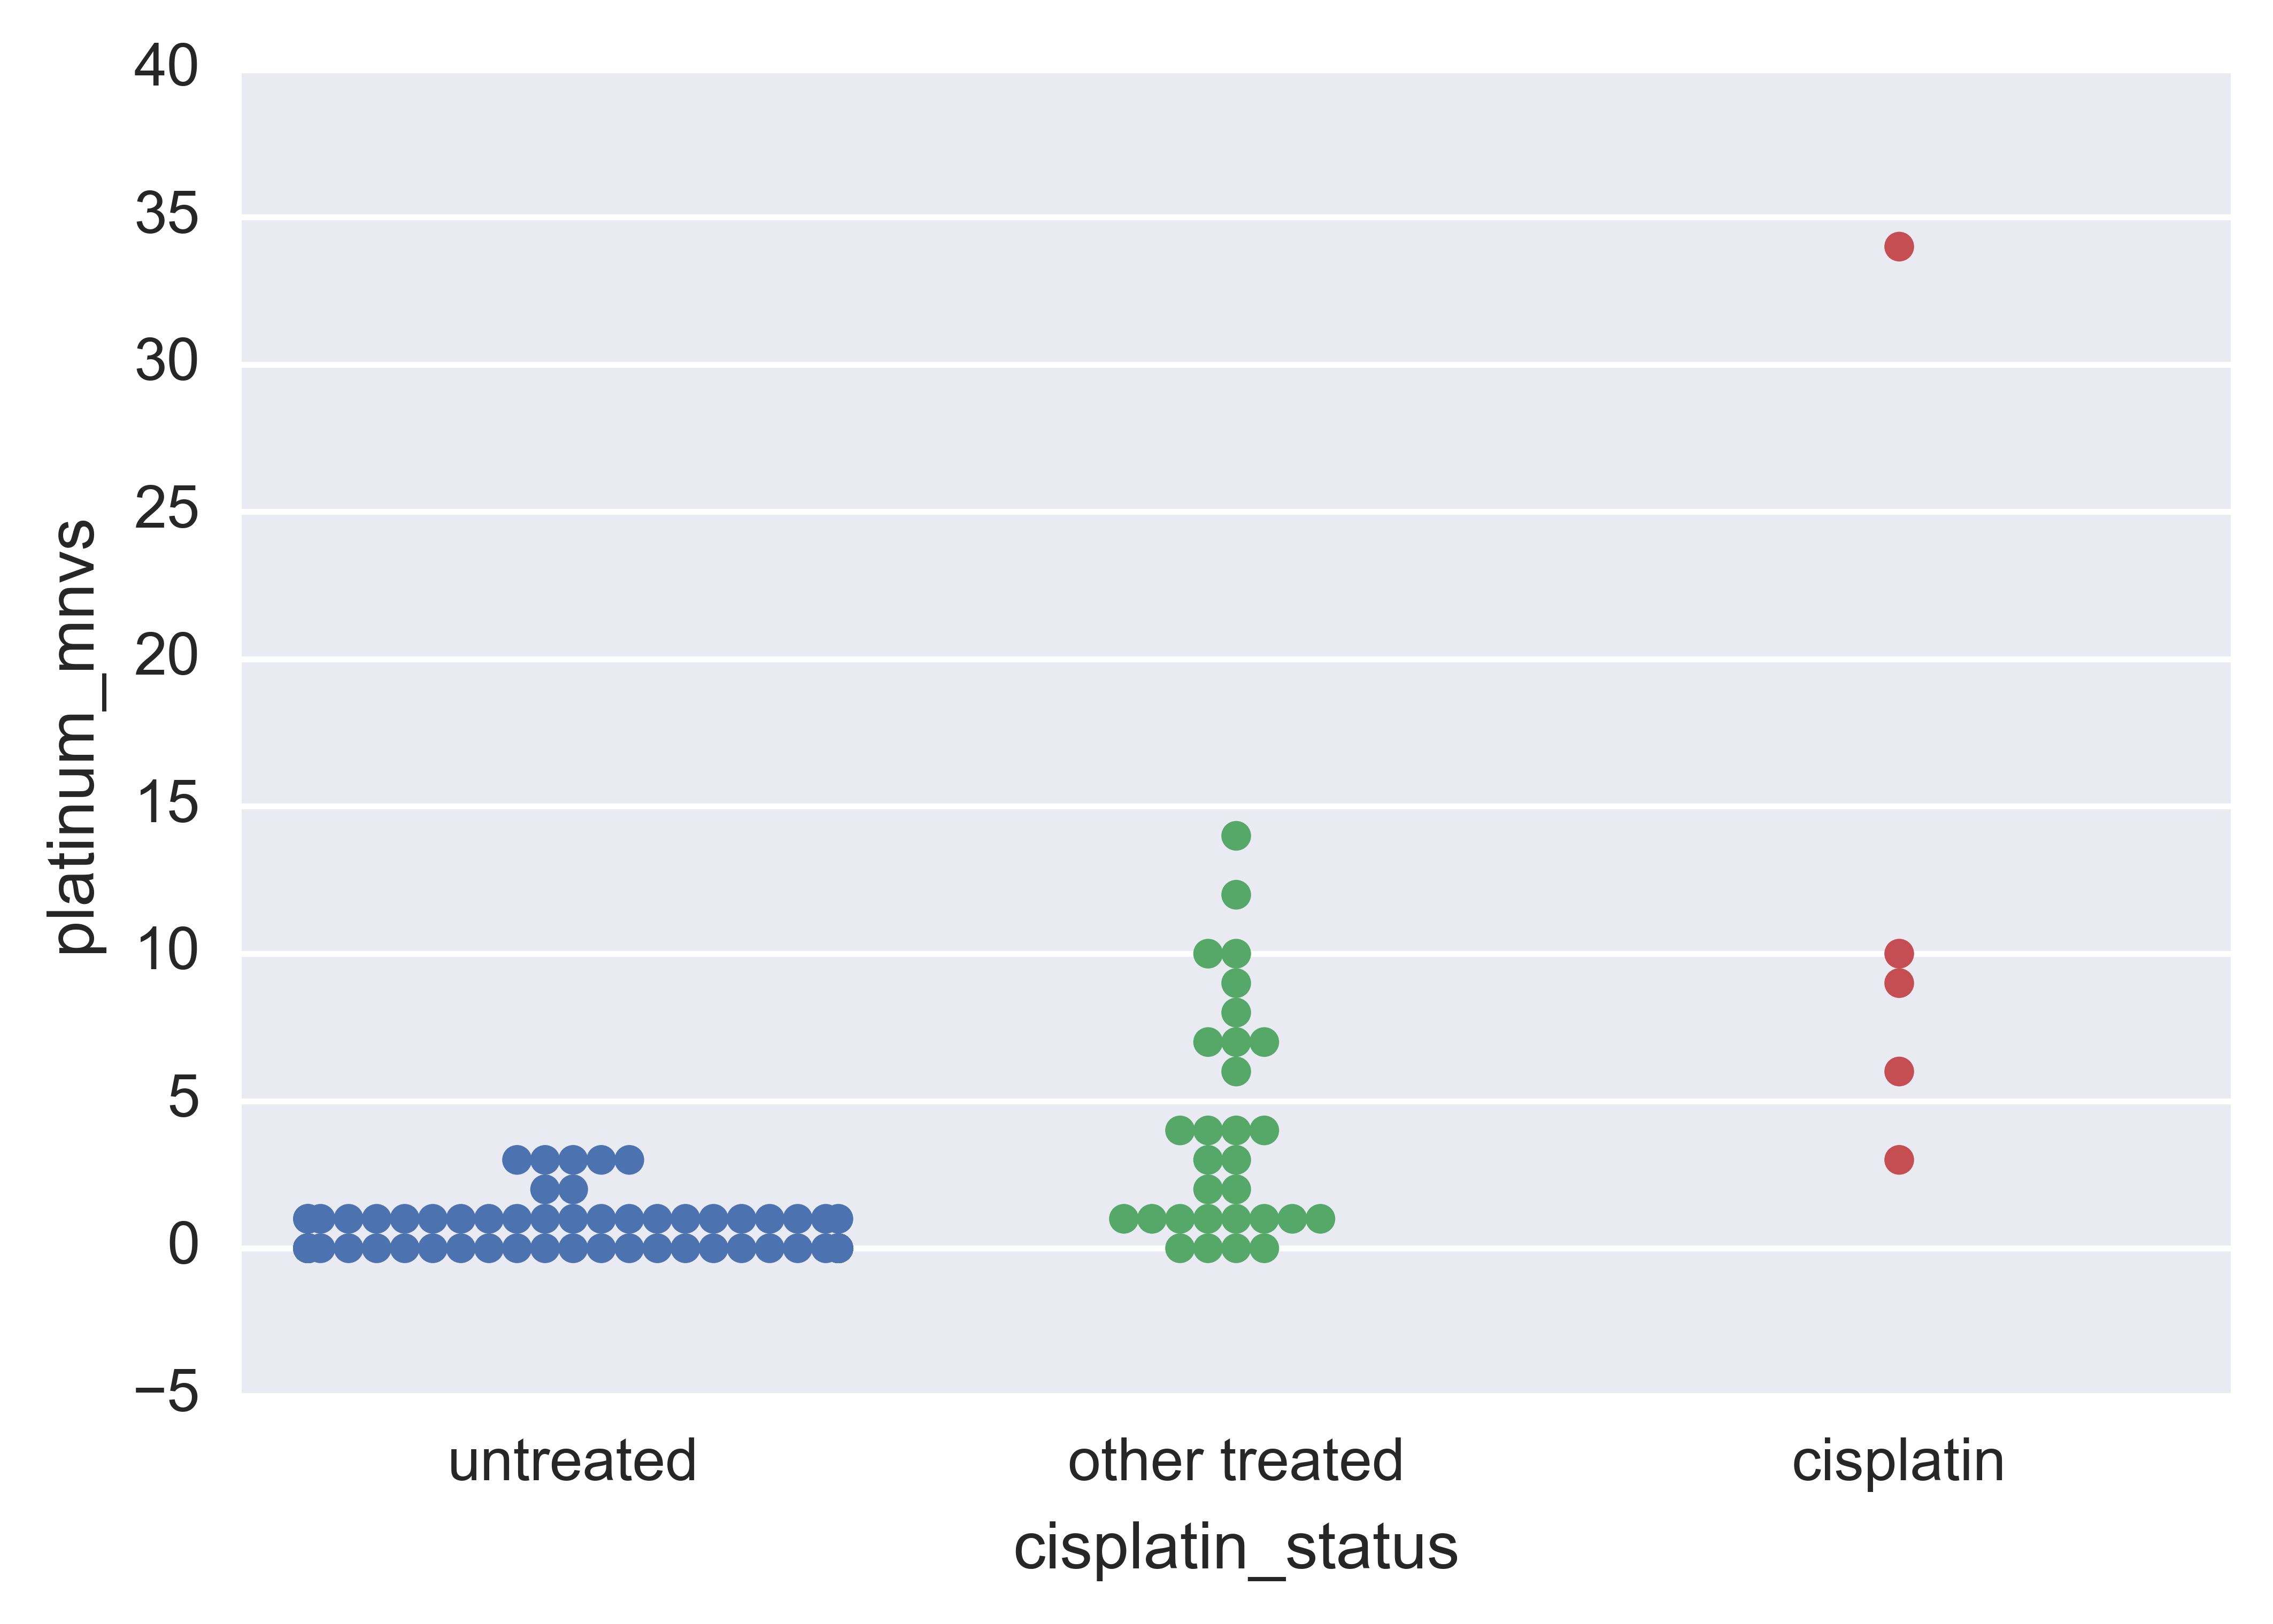

In [41]:
seaborn.swarmplot(data=sources, x="cisplatin_status", y="mnvs")
pyplot.figure()
seaborn.swarmplot(data=sources, x="cisplatin_status", y="platinum_mnvs")

In [61]:
def mwu(s1, s2):
    print("%f %f p=%f" % (s1.mean(), s2.mean(), scipy.stats.mstats.mannwhitneyu(s1, s2).pvalue))
    

In [71]:
bootstrap(sources.ix[sources.treated].platinum_mnvs.sort(ascending=False, inplace=False))

(3.7428571428571429, 7.1728571428571479)

In [72]:
numpy.mean(sources.ix[sources.treated].platinum_mnvs.sort(ascending=False, inplace=False))

5.3142857142857141

In [74]:
sources.ix[sources.treated].mnvs.sort(ascending=False, inplace=False)

source_id
AOCS-139-4/SP101906     442
AOCS-139-16/SP101896    433
AOCS-092-13/SP101630    361
AOCS-139-17/SP101901    284
AOCS-064-13/SP101554    255
AOCS-155-13/SP102045    251
AOCS-095-13/SP101650    225
AOCS-120-13/SP101740    215
AOCS-093-13/SP101638    199
AOCS-138-13/SP101881    192
AOCS-086-13/SP101606    180
AOCS-135-14/SP101860    174
AOCS-150-14/SP102015    169
AOCS-150-13/SP102010    162
AOCS-088-13/SP101612    161
AOCS-091-13/SP101624    159
AOCS-117-13/SP101724    150
AOCS-137-13/SP101871    149
AOCS-034-13/SP101524    143
AOCS-135-13/SP101855    139
AOCS-106-1/SP101670     137
AOCS-119-13/SP101732    128
AOCS-134-13/SP101845    119
AOCS-167-13/SP102143    114
AOCS-094-2/SP106641     110
AOCS-167-4/SP102151     107
AOCS-167-16/SP102148    104
AOCS-142-13/SP101931     88
AOCS-141-13/SP101916     86
AOCS-141-14/SP101921     86
AOCS-065-13/SP101560     81
AOCS-158-1/SP102064      58
AOCS-162-1/SP102096      30
AOCS-169-1/SP102168      20
AOCS-077-1/SP101572      15
Name: mnvs

In [62]:
mwu(
    sources.ix[sources.treated].fraction_platinum_mnvs,
    sources.ix[~sources.treated].fraction_platinum_mnvs)

0.000370 0.000056 p=0.000000


In [63]:
mwu(
    sources.ix[sources.treated].fraction_mnvs,
    sources.ix[~sources.treated].fraction_mnvs)

0.011752 0.007758 p=0.000001


In [64]:
mwu(
    sources.ix[sources.treated].indels,
    sources.ix[~sources.treated].indels)

6.771429 4.275000 p=0.009418


In [65]:
mwu(
    sources.ix[sources.treated].fraction_indels,
    sources.ix[~sources.treated].fraction_indels)

0.000509 0.000551 p=0.864836
